In [1]:
import traceback
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from src.eval import eval, daily_to_annual

In [2]:
symbols = [
    'MSFT',
    'AAPL',
    'NVDA',
    'GOOGL',
    'AMZN',
    'BRK-A',
    'TSM',
    'LLY',
    'AVGO',
    'V',
    'NVO',
    'JPM',
    'TSLA',
    'WMT',
    'XOM',
    'MA',
    'UNH',
    'ASML',
    'PG',
    'JNJ',
    'HD',
    'ORCL',
    'TM',
    'COST',
    'MRK',
    'CVX',
    'ABBV',
    'CRM',
    'BAC',
    'VOO'
]

In [3]:
rate_of_returns = []
risks = []

for symbol in tqdm(symbols):
    try:
        rate_of_return, risk = eval(symbol, start = '2015', plot = False)
        rate_of_return = daily_to_annual(rate_of_return)

        rate_of_returns.append(rate_of_return)
        risks.append(risk)

    except Exception:
        msg = traceback.format_exc()
        print(symbol)
        print(msg)

100%|██████████| 30/30 [00:19<00:00,  1.51it/s]


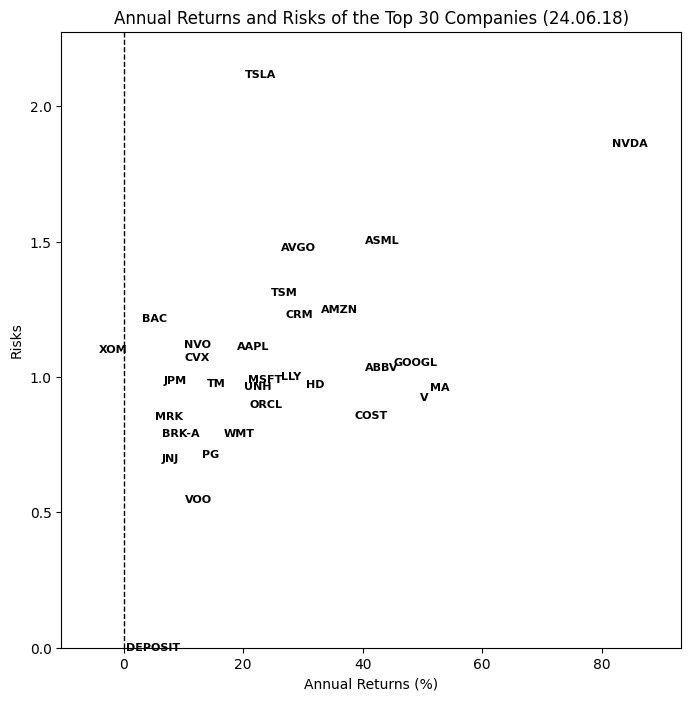

In [4]:
plt.figure(figsize = (8, 8))

for symbol, x, y in zip(symbols, rate_of_returns, risks):
    plt.text(
        x = x, 
        y = y, 
        s = symbol, 
        fontsize = 8, 
        horizontalalignment = 'center', 
        verticalalignment = 'center', 
        weight = 'bold'
    )

plt.text(
    x = 5, 
    y = 0, 
    s = 'DEPOSIT', 
    fontsize = 8, 
    horizontalalignment = 'center', 
    verticalalignment = 'center', 
    weight = 'bold'
)

xr = np.max(rate_of_returns) - np.min(rate_of_returns)
xmin = np.min(rate_of_returns) - xr * 0.1
xmax = np.max(rate_of_returns) + xr * 0.1
plt.xlim(xmin, xmax)

yr = np.max(risks) - np.min(risks)
ymax = np.max(risks) + yr * 0.1
plt.ylim(0, ymax)

plt.plot([0, 0], [0, ymax], ls = '--', lw = 1, color = 'k')

plt.title('Annual Returns and Risks of the Top 30 Companies (24.06.18)')
plt.xlabel('Annual Returns (%)')
plt.ylabel('Risks')
plt.show()